## LAB1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### №2. Reduce the size of the octagon by 1.5

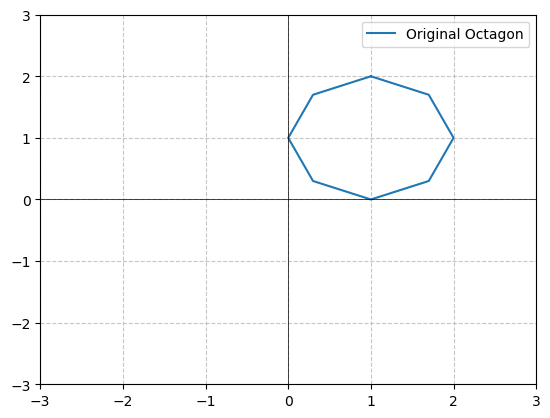

In [2]:
octagon = np.array([[1, 1.7, 2, 1.7, 1, 0.3, 0, 0.3, 1], [2, 1.7, 1, 0.3, 0, 0.3, 1, 1.7, 2]])

plt.plot(octagon[0, :], octagon[1, :], label='Original Octagon')
plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

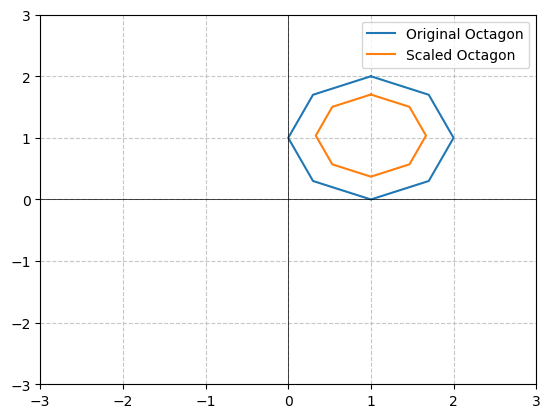

In [14]:
def scale2(a, b):
    return np.array([[a, 0], [0, b]]) * np.array([[1, 1], [1, 1]])

plt.plot(octagon[0, :], octagon[1, :], label='Original Octagon')

scale_x = 2/3
scale_y = 2/3

center_of_mass = np.mean(octagon, axis=1, keepdims=True)
scaled_octagon = center_of_mass + np.dot(scale2(scale_x, scale_y),(octagon - center_of_mass))

plt.plot(scaled_octagon[0, :], scaled_octagon[1, :], label='Scaled Octagon')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### №3. Reflect octagon relatively to (0,0)

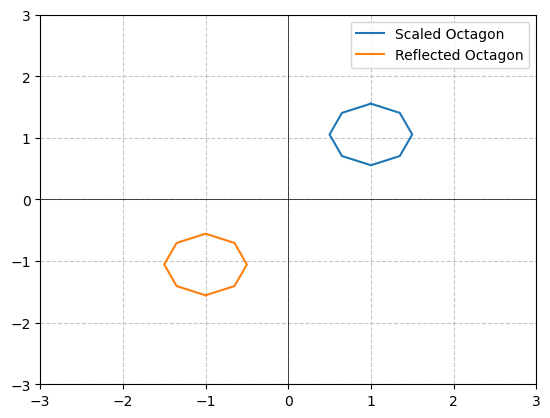

In [4]:
plt.plot(scaled_octagon[0, :], scaled_octagon[1, :], label='Scaled Octagon')

reflection = np.array([[-1, 0], [0, -1]])

reflected_octagon = np.dot(reflection,(scaled_octagon - np.array([[0], [0]])))

plt.plot(reflected_octagon[0, :], reflected_octagon[1, :], label='Reflected Octagon')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### №4. Reflect octagon across the line

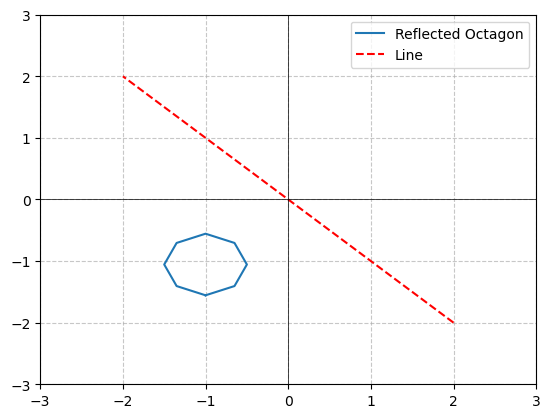

array([[-1.        , -1.35      , -1.5       , -1.35      , -1.        ,
        -0.65      , -0.5       , -0.65      , -1.        ],
       [-1.55555556, -1.40555556, -1.05555556, -0.70555556, -0.55555556,
        -0.70555556, -1.05555556, -1.40555556, -1.55555556]])

In [5]:
plt.plot(reflected_octagon[0, :], reflected_octagon[1, :], label='Reflected Octagon')
plt.plot([2, -2], [-2, 2], color='red', linestyle='--', label='Line')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
reflected_octagon

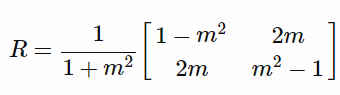

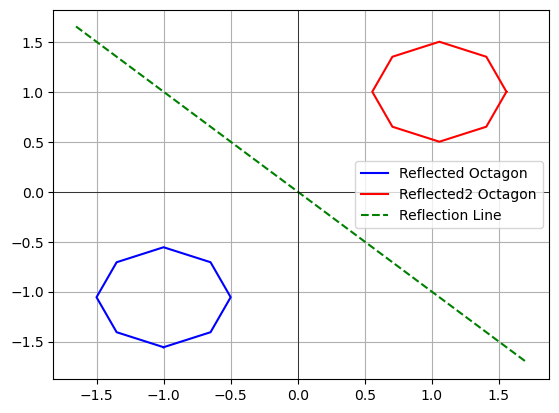

In [6]:
m = -1  # y=mx

def reflect(x, y):
    xhat = np.array([x, y]).T
    matrix = np.array([[1 - m**2, 2 * m], [2 * m, m**2 - 1]])
    matrix = matrix * (1 / (1 + m**2))

    R = matrix.dot(xhat)
    return R

reflected2_octagon = np.apply_along_axis(lambda point: reflect(point[0], point[1]), 0, reflected_octagon) # "0" = applied along axis 0 

plt.plot(reflected_octagon[0], reflected_octagon[1], color="b", label="Reflected Octagon")
plt.plot(reflected2_octagon[0], reflected2_octagon[1], color="r", label="Reflected2 Octagon")

# x_range = plt.gca().get_xlim()  # gca = get current axes
# X_LINE = [x for x in np.arange(x_range[0], x_range[1], 0.1)]
# Y_LINE = [m * x for x in X_LINE]

X_LINE = np.linspace(*plt.xlim(), 100)  # "*" - unpack the tuple returned by plt.xlim()
Y_LINE = m * X_LINE

plt.plot(X_LINE, Y_LINE, color='g', linestyle='dashed', label="Reflection Line")
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.grid(True)
plt.legend()
plt.show()

### №6. Do steps 2–4 for any figure in a xlsx file

In [7]:
df = pd.read_excel("Variants.xlsx", sheet_name=3)
x = df['X']
y = df['Y']

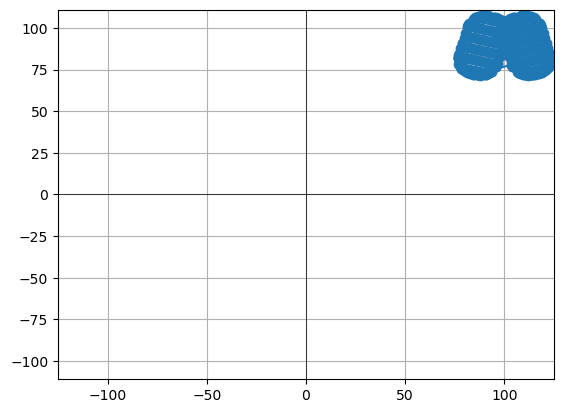

In [8]:
plt.plot(x, y, marker='o', linestyle='-')
plt.xlim([-125, 125])
plt.ylim([-111,111])
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.show()

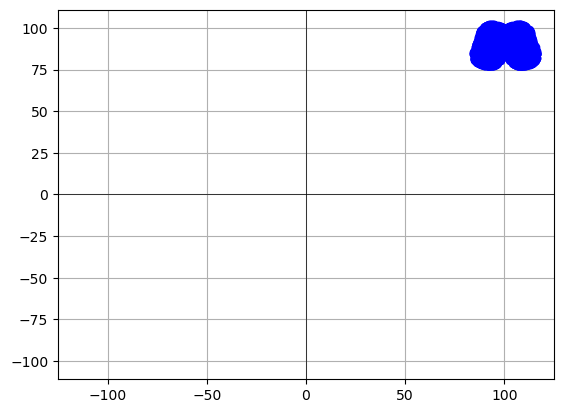

In [15]:
center_x = x.mean()
center_y = y.mean()

scale_factor = 1.5

x_scaled = (x - center_x) / scale_factor + center_x
y_scaled = (y - center_y) / scale_factor + center_y

scaled_fig = np.array([x_scaled.values, y_scaled.values])

plt.plot(scaled_fig[0, :], scaled_fig[1, :], marker='o', linestyle='-', color='b')
plt.xlim([-125, 125])
plt.ylim([-111, 111])
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.show()

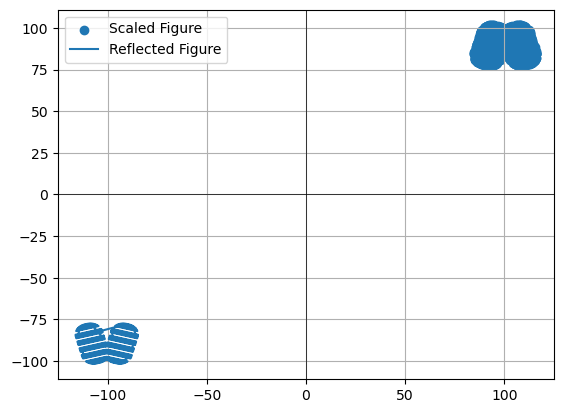

In [12]:
scaled_fig = np.array([x_scaled.values, y_scaled.values])

plt.scatter(x_scaled,y_scaled, label='Scaled Figure')

reflected_fig = np.dot(reflection, scaled_fig) 

plt.plot(reflected_fig[0, :], reflected_fig[1, :], label='Reflected Figure')

plt.xlim([-125, 125])
plt.ylim([-111,111])
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.grid(True)
plt.legend()
plt.show()

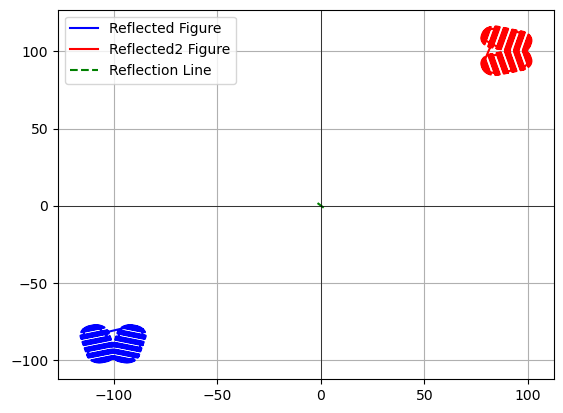

In [11]:
reflected2_fig = np.apply_along_axis(lambda point: reflect(point[0], point[1]), 0, reflected_fig)

plt.plot(reflected_fig[0], reflected_fig[1], color="b", label="Reflected Figure")
plt.plot(reflected2_fig[0], reflected2_fig[1], color="r", label="Reflected2 Figure")
plt.plot(X_LINE, Y_LINE, color='g', linestyle='dashed', label="Reflection Line")

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)  
plt.axvline(0, color='black', linewidth=0.5)  
plt.legend()
plt.show()